<a href="https://colab.research.google.com/github/CandyCheng-git/AI-ML-Assessment-2025-01/blob/main/TECH3200_Ass2_Share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created Date time
------------
on Week 9 - 21 Jan 2025

@authors:
Group 5
- 1844721 - Lok Tung Cheng
- 1830678 - Alyssa Jinnel Libed
- 1832217 - Rachel Inoue
- 1830167 - Bhuwan Basnet

## Problem
------------
Predict car price

## Solving
------------
1. Using some mechine learning models to provide different approaches.
2. Sharing which model is working better


# 1. Dataset Overview

In [ ]:
# General Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Machine Learning Libraries

# Utility Libraries



In [ ]:
FILE_PATH = (
    "Full Dataset Australian Vehicle Prices Assessment 2 2024 T3.csv"
)

df_orign = pd.read_csv(FILE_PATH, # Read the CSV file into a Original DataFrame
    na_values=['POA', '-', '- / -'],
)  # set 'POA', '-', '- / -' as missing value

print("\n* Dataset loaded successfully!\n")  # Confirmation message


* Dataset loaded successfully!



## Display initial dataset information

### Key Features from the dataset:
- Brand: Name of the car manufacturer
- Year: Year of manufacture or release
- Model: Name or code of the car model
- Car/Suv: Type of the car (car or suv)
- Title: Title or description of the car
- UsedOrNew: Condition of the car (used or new)
- Transmission: Type of transmission (manual or automatic)
- Engine: Engine capacity or power (in litres or kilowatts)
- DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
- FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
- FuelConsumption: Fuel consumption rate (in litres per 100 km)
- Kilometres: Distance travelled by the car (in kilometres)
- ColourExtInt: Colour of the car (exterior and interior)
- Location: Location of the car (city and state)
- CylindersinEngine: Number of cylinders in the engine
- BodyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
- Doors: Number of doors in the car
- Seats: Number of seats in the car
- Price: Price of the car (in Australian dollars)


### Display initial dataset information

In [ ]:
print("\n* Original Dataset sample:\n")
df_orign.head()


* Original Dataset sample:



,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0


In [ ]:

print("\n* Original Dataset Info:")
print(df_orign.info())

print("\n* Original Dataset Columns:\n", df_orign.columns)

print("\n* Original Data types of each Column:\n", df_orign.dtypes)

print("\n* Original Empty Values:\n", df_orign.isnull().sum())



* Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16482 non-null  object 
 7   Engine             15059 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16096 non-null  object 
 10  FuelConsumption    15036 non-null  object 
 11  Kilometres         16142 non-null  float64
 12  ColourExtInt       16374 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  15059 non-null  object 
 15  BodyType           16452 non-null  object 
 

## Display % of Missing value on each columns

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df_orign.isnull().sum() / len(df_orign) * 100

# Convert to DataFrame for better visualization
missing_df = missing_percentage.reset_index()
missing_df.columns = ['Column', 'Missing Percentage']

# Sort the DataFrame by Missing Percentage in descending order
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)


# Display the ranked DataFrame
print("\n* Print the ranked Missing Percentage:")
print(missing_df)

# Get the top 10 columns
top_10_columns = missing_df.head(10)['Column'].tolist()

# Display the top 10 column names
print("\n* Print the top 10 column name on Missing Percentage:")
print(top_10_columns)


* Print the ranked Missing Percentage:
               Column  Missing Percentage
17              Seats           10.188837
10    FuelConsumption           10.147006
14  CylindersinEngine           10.009561
7              Engine           10.009561
16              Doors            9.585275
9            FuelType            3.812597
11         Kilometres            3.537708
13           Location            2.689136
12       ColourExtInt            2.151309
15           BodyType            1.685192
6        Transmission            1.505916
18              Price            0.316720
3             Car/Suv            0.167324
1                Year            0.005976
8           DriveType            0.005976
5           UsedOrNew            0.005976
4               Title            0.005976
2               Model            0.005976
0               Brand            0.005976

* Print the top 10 column name on Missing Percentage:
['Seats', 'FuelConsumption', 'CylindersinEngine', 'Engine', 'Door

### [Visualization] Percentage of data missing from each column


* Data missing from each column


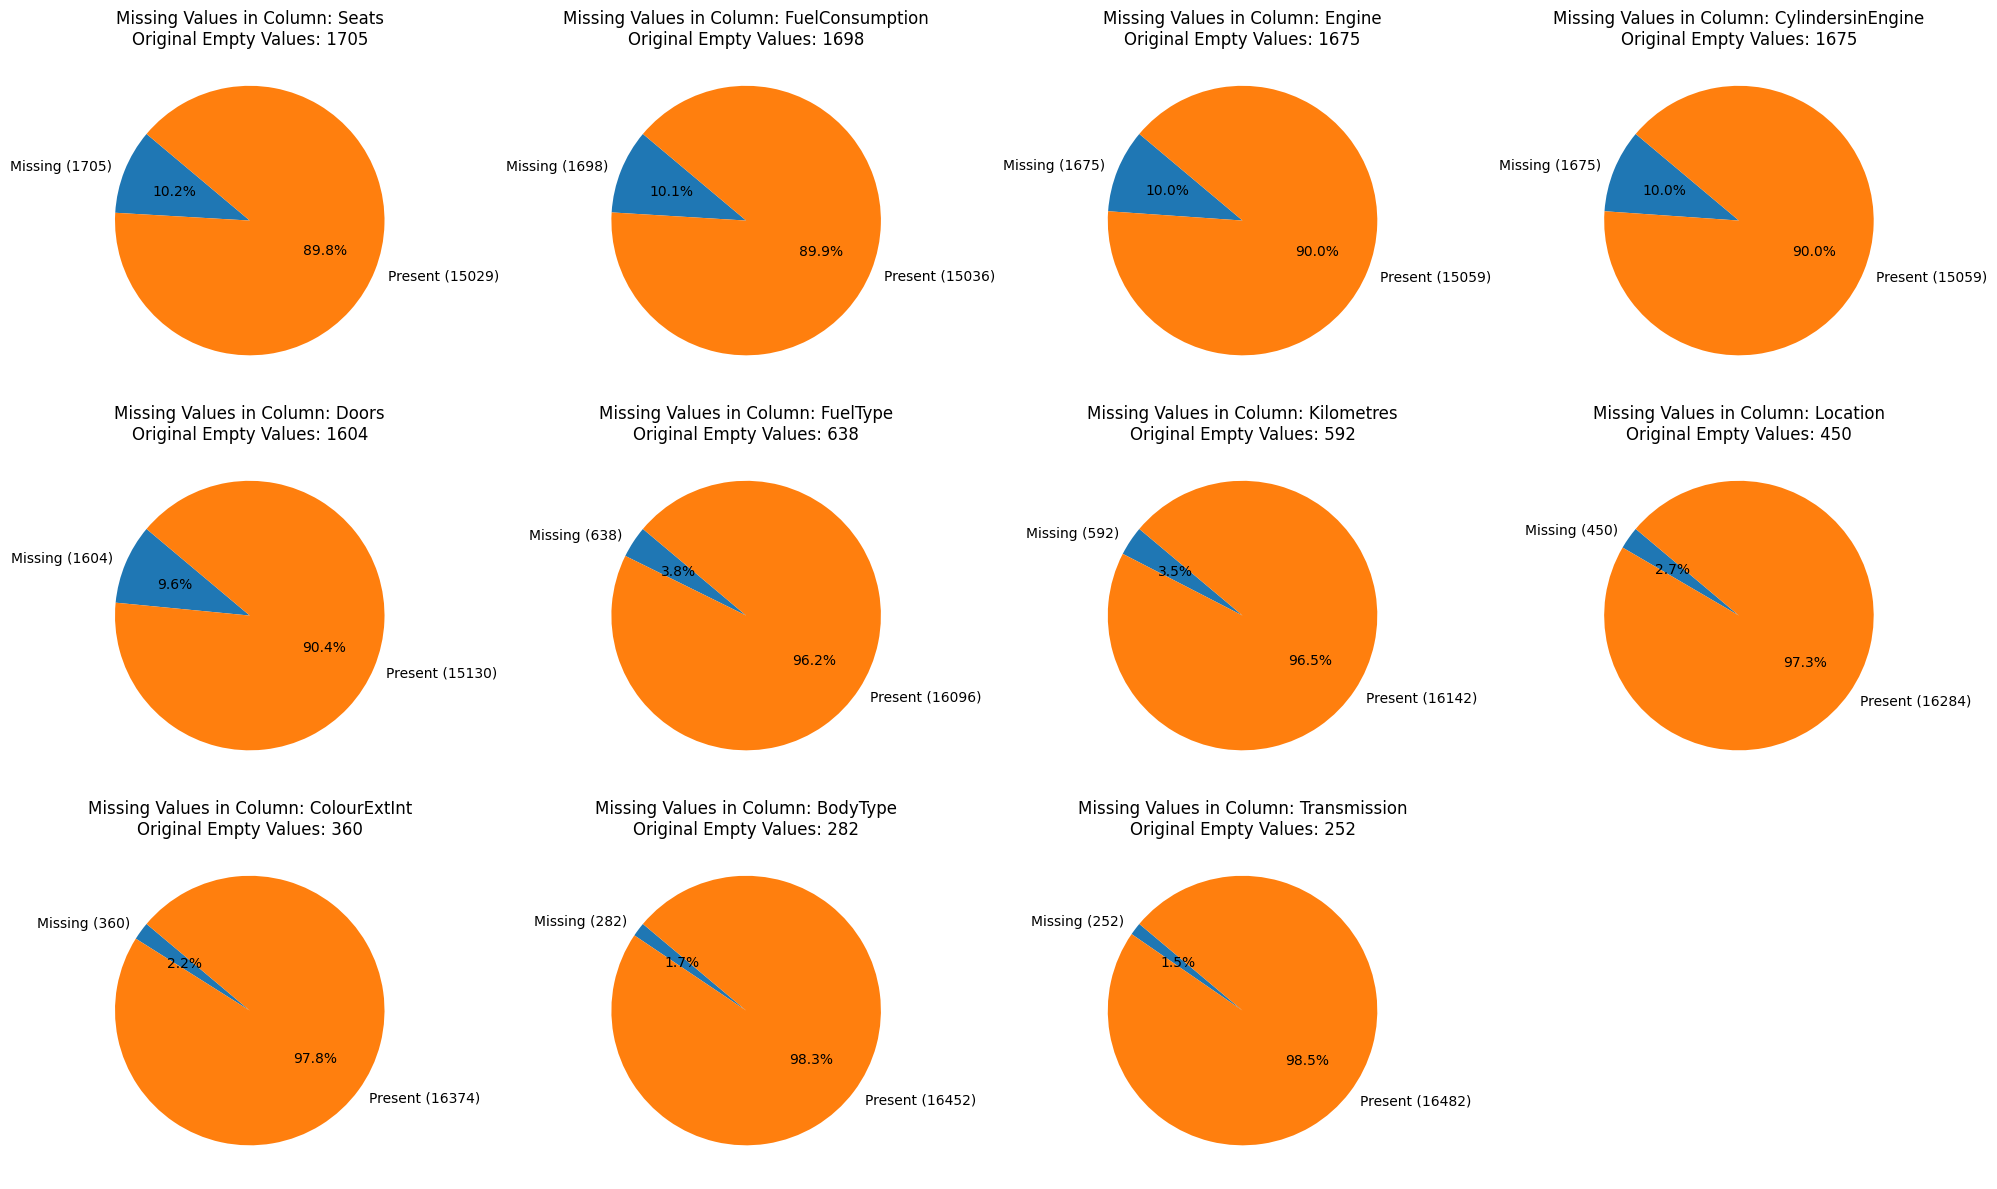

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Check for missing values
missing_counts = df_orign.isnull().sum()

# Calculate total number of rows
total_rows = len(df_orign)

# Calculate percentage of missing values for each column
missing_percentage = (missing_counts / total_rows) * 100

# Filter columns with more than 1% missing values and sort by percentage
filtered_missing_counts = missing_counts[missing_counts > 1]
sorted_missing_percentage = missing_percentage[missing_percentage > 1].sort_values(ascending=False)

# Check if there are any columns meeting the criteria
if not sorted_missing_percentage.empty:
    # Number of charts
    num_charts = len(sorted_missing_percentage)

    # Determine number of rows needed (4 charts per row)
    num_rows = (num_charts + 3) // 4  # using integer division

    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 4 * num_rows))

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    for i, column in enumerate(sorted_missing_percentage.index):
        axes[i].pie(
            [filtered_missing_counts[column], total_rows - filtered_missing_counts[column]],
            labels=[
                f'Missing ({filtered_missing_counts[column]})',
                f'Present ({total_rows - filtered_missing_counts[column]})'
            ],
            autopct='%1.1f%%',
            startangle=140
        )
        axes[i].set_title(f'Missing Values in Column: {column}\nOriginal Empty Values: {filtered_missing_counts[column]}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    print("\n* Data missing from each column")
    plt.tight_layout()
    plt.show()
else:
    print("No columns with original empty values greater than 1.")

## [Visualization] 1st Check columns data type

In [ ]:
import numpy as np

def plot_dtype_count(df):
    """
    Create and plot the count of each data type in the given DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame for analysis.
    """
    # Create a DataFrame for plotting
    dtype_df = df.dtypes.reset_index()
    dtype_df.columns = ['Column', 'Data Type']

    # Count occurrences of each data type
    dtype_count = dtype_df['Data Type'].value_counts()

    # Function to generate random colors
    def generate_random_colors(num_colors):
        return [plt.cm.viridis(np.random.rand()) for _ in range(num_colors)]

    # Generate random colors
    bar_colors = generate_random_colors(len(dtype_count))

    # Plotting
    plt.figure(figsize=(10, 6))
    ax = dtype_count.plot(kind='bar', color=bar_colors)
    plt.title('Count of Each Data Type in the DataFrame')
    plt.xlabel('Data Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Annotate each bar with its value
    for i in range(len(dtype_count)):
        plt.text(
            i,
            dtype_count.iloc[i] + 0.2,  # Use .iloc to access by position
            str(dtype_count.iloc[i]),   # Use .iloc to access by position
            ha='center',
            va='bottom'
        )

    plt.grid()
    plt.show()


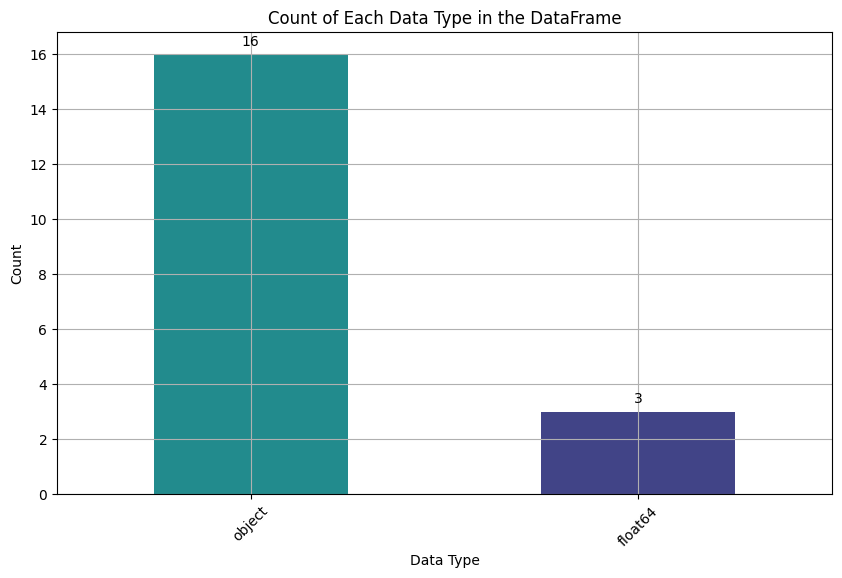

In [ ]:
plot_dtype_count(df_orign)

# 2. Data Preprocessing

In [ ]:
# Copy the Original DataFrame
df_data_analysis = df_orign.copy()

## Standardized column
- Ensure column names are standardized and lowercase

In [ ]:
# Ensure column names are standardized and lowercase
df_data_analysis.columns = (
    df_data_analysis.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '.')
)

# Print column names to check for 'price'
print("Column names after normalization:")
print(df_data_analysis.columns)

Column names after normalization:
Index(['brand', 'year', 'model', 'car/suv', 'title', 'usedornew',
       'transmission', 'engine', 'drivetype', 'fueltype', 'fuelconsumption',
       'kilometres', 'colourextint', 'location', 'cylindersinengine',
       'bodytype', 'doors', 'seats', 'price'],
      dtype='object')


## Handle missing values

### Check and fill missing values by .fillna

In [ ]:
# Check for missing values
missing_counts = df_data_analysis.isnull().sum()
print("\nMissing values in all columns before filling:")
print(missing_counts[missing_counts > 0])

# Fill missing values
for column in missing_counts[missing_counts > 0].index:
    if df_data_analysis[column].dtype in ['float64', 'int64']:
        # Fill numerical columns with the mean
        df_data_analysis[column] = df_data_analysis[column].fillna(df_data_analysis[column].mean())
    else:
        # Fill categorical columns with the mode
        mode_value = df_data_analysis[column].mode()[0]
        df_data_analysis[column] = df_data_analysis[column].fillna(mode_value)

# Handling the price column
# Print the current DataFrame to confirm the presence of 'price' column
print("\nDataFrame before handling the price column:")
print(df_data_analysis)

# Convert price to numeric after confirming the column name
df_data_analysis['price'] = pd.to_numeric(df_data_analysis['price'], errors='coerce')
df_data_analysis['price'] = df_data_analysis['price'].fillna(df_data_analysis['price'].mean())

# Final check for missing values
print("\nMissing Values After Filling:")
print(df_data_analysis.isnull().sum())

# Print the cleaned DataFrame
print("\nCleaned Dataset Sample:")
print(df_data_analysis.head())


Missing values in all columns before filling:
brand                   1
year                    1
model                   1
car/suv                28
title                   1
usedornew               1
transmission          252
engine               1675
drivetype               1
fueltype              638
fuelconsumption      1698
kilometres            592
colourextint          360
location              450
cylindersinengine    1675
bodytype              282
doors                1604
seats                1705
price                  53
dtype: int64

DataFrame before handling the price column:
               brand    year    model               car/suv  \
0          Ssangyong  2022.0   Rexton  Sutherland Isuzu Ute   
1                 MG  2022.0      MG3             Hatchback   
2                BMW  2022.0     430I                 Coupe   
3      Mercedes-Benz  2011.0     E500                 Coupe   
4            Renault  2022.0   Arkana                   SUV   
...              ...   

## Convert all features into numerical format
- Before correlations, convert all features into numerical format

### 1. Check non-numeric columns

In [ ]:
# Select non-numeric columns
non_numeric_columns = df_data_analysis.select_dtypes(include=['object']).columns

# Check if there are any non-numeric columns
if non_numeric_columns.empty:
    print("\nAll columns are numeric.")
else:
    print("\nRemaining non-numeric columns that may need conversion:")
    print(non_numeric_columns)





Remaining non-numeric columns that may need conversion:
Index(['brand', 'model', 'car/suv', 'title', 'usedornew', 'transmission',
       'engine', 'drivetype', 'fueltype', 'fuelconsumption', 'colourextint',
       'location', 'cylindersinengine', 'bodytype', 'doors', 'seats'],
      dtype='object')


### 2. Define the columns to loop through

In [ ]:
# Define the columns to loop through
columns_to_encode = {
    'brand': 'brand_num',
    'model': 'model_num',
    'car/suv': 'car_suv_num',
    'title': 'title_num',
    'usedornew': 'usedornew_num',
    'transmission': 'transmission_num',
    'engine': 'engine_num',
    'drivetype': 'drivetype_num',
    'fueltype': 'fueltype_num',
    'fuelconsumption': 'fuelconsumption_num',
    'colourextint': 'colourextint_num',
    'location': 'location_num',
    'cylindersinengine': 'cylindersinengine_num',
    'bodytype': 'bodytype_num',
    'doors': 'doors_num',
    'seats': 'seats_num',
}

### 3. Encode categorical columns to numeric

In [ ]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(df, columns):
    # Initialize a results dictionary
    results = {}
    mappings = {}  # To store the mapping of brands

    for target_column_name, new_column_name in columns.items():
        # Initialize the Label Encoder
        label_encoder = LabelEncoder()

        # Fit and transform the target column
        df[new_column_name] = label_encoder.fit_transform(df[target_column_name])

        # Store results in the dictionary
        results[target_column_name] = {
            'total_categories': len(label_encoder.classes_),
            'categories': label_encoder.classes_.tolist()
        }

        # Create a mapping of original values to encoded values
        mappings[target_column_name] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

        # Optionally print the original values and their encoded counterparts
        #print(f"\n* df['{new_column_name}']:")
        #print(df[new_column_name].head())

        # Original values and their encoded counterparts
        original_values = df[target_column_name].head()
        encoded_values = df[new_column_name].head()
        #for original, encoded in zip(original_values, encoded_values):
        #    print(f"{original}: {encoded}")

    return results, mappings  # Return both results and mappings

In [ ]:
# Call the function and save results
encoding_results, encoding_mappings = encode_columns(df_data_analysis, columns_to_encode)


In [ ]:

print(encoding_results.keys())

# Print the results dictionary
#print("\nEncoding Results:")
#for column, info in encoding_results.items():
#    print(f"\n{column}:")
#    print(f"  Total categories: {info['total_categories']}")
#    print(f"  Categories: {info['categories']}")

dict_keys(['brand', 'model', 'car/suv', 'title', 'usedornew', 'transmission', 'engine', 'drivetype', 'fueltype', 'fuelconsumption', 'colourextint', 'location', 'cylindersinengine', 'bodytype', 'doors', 'seats'])


In [ ]:
print("\n* Example: Brand Mapping:")
brand_mapping = encoding_mappings['brand']
print(brand_mapping)


* Example: Brand Mapping:
{'Abarth': 0, 'Alfa': 1, 'Aston': 2, 'Audi': 3, 'BMW': 4, 'BYD': 5, 'Bentley': 6, 'Caterham': 7, 'Chery': 8, 'Chevrolet': 9, 'Chrysler': 10, 'Citroen': 11, 'Cupra': 12, 'Daewoo': 13, 'Daihatsu': 14, 'Datsun': 15, 'Dodge': 16, 'FPV': 17, 'Ferrari': 18, 'Fiat': 19, 'Ford': 20, 'Foton': 21, 'GWM': 22, 'Geely': 23, 'Genesis': 24, 'Great': 25, 'HSV': 26, 'Haval': 27, 'Hino': 28, 'Holden': 29, 'Honda': 30, 'Hummer': 31, 'Hyundai': 32, 'Ineos': 33, 'Infiniti': 34, 'International': 35, 'Isuzu': 36, 'Iveco': 37, 'Jaguar': 38, 'Jeep': 39, 'Kia': 40, 'LDV': 41, 'Lamborghini': 42, 'Land': 43, 'Lexus': 44, 'Lotus': 45, 'MG': 46, 'Mahindra': 47, 'Maserati': 48, 'Mazda': 49, 'McLaren': 50, 'Mercedes-Benz': 51, 'Mini': 52, 'Mitsubishi': 53, 'Nissan': 54, 'Opel': 55, 'Packard': 56, 'Peugeot': 57, 'Polestar': 58, 'Porsche': 59, 'Proton': 60, 'Ram': 61, 'Renault': 62, 'Rolls-Royce': 63, 'Rover': 64, 'Saab': 65, 'Skoda': 66, 'Smart': 67, 'Ssangyong': 68, 'Subaru': 69, 'Suzuki': 

In [ ]:
# Display the modified DataFrame
print("\nModified DataFrame:")
print(df_data_analysis.info())


Modified DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  16734 non-null  object 
 1   year                   16734 non-null  float64
 2   model                  16734 non-null  object 
 3   car/suv                16734 non-null  object 
 4   title                  16734 non-null  object 
 5   usedornew              16734 non-null  object 
 6   transmission           16734 non-null  object 
 7   engine                 16734 non-null  object 
 8   drivetype              16734 non-null  object 
 9   fueltype               16734 non-null  object 
 10  fuelconsumption        16734 non-null  object 
 11  kilometres             16734 non-null  float64
 12  colourextint           16734 non-null  object 
 13  location               16734 non-null  object 
 14  cylindersinengine      16734 non-

### [Visualization] 2nd Check columns data type

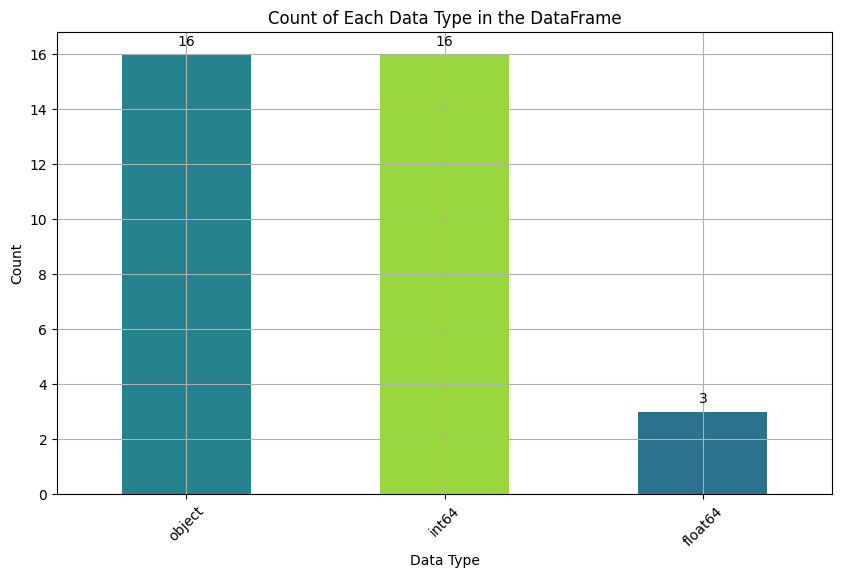

In [ ]:
plot_dtype_count(df_data_analysis)

### Drop non-numeric columns and calculate the key feature correlations

In [ ]:
df_data_analysis_numeric_df = df_data_analysis.select_dtypes(include=['float64', 'int32', 'int64'])

In [ ]:
# Display the modified DataFrame
print("\n* Modified numeric DataFrame:")
print(df_data_analysis_numeric_df.info())


* Modified numeric DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   16734 non-null  float64
 1   kilometres             16734 non-null  float64
 2   price                  16734 non-null  float64
 3   brand_num              16734 non-null  int64  
 4   model_num              16734 non-null  int64  
 5   car_suv_num            16734 non-null  int64  
 6   title_num              16734 non-null  int64  
 7   usedornew_num          16734 non-null  int64  
 8   transmission_num       16734 non-null  int64  
 9   engine_num             16734 non-null  int64  
 10  drivetype_num          16734 non-null  int64  
 11  fueltype_num           16734 non-null  int64  
 12  fuelconsumption_num    16734 non-null  int64  
 13  colourextint_num       16734 non-null  int64  
 14  location_num           

### [Visualization] 3rd Check columns data type

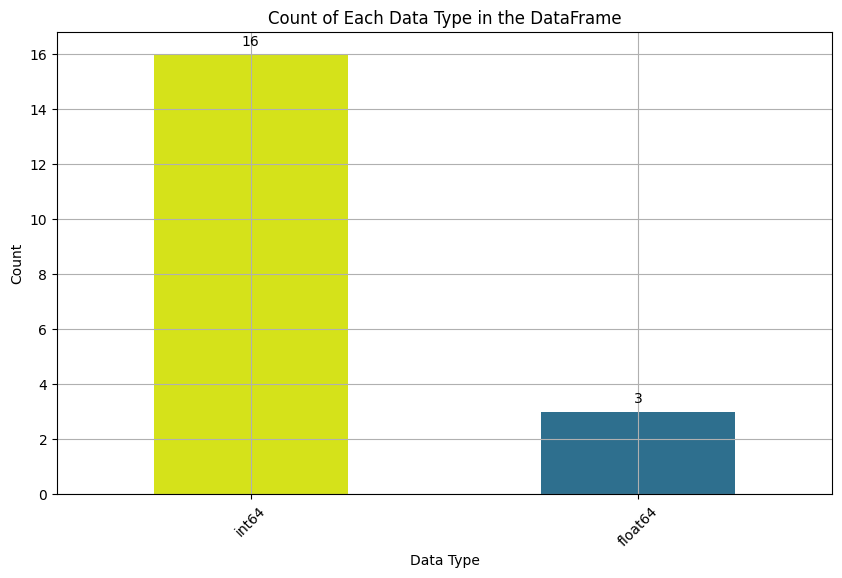

In [ ]:
plot_dtype_count(df_data_analysis_numeric_df)

# 3. Exploratory Data Analysis EDA

In [ ]:
import seaborn as sns


In [ ]:
def generate_random_colors(dataframe, column):
    """
    Generate a list of random hex colors based on the unique categories in the specified column of the DataFrame.

    Parameters:
    - dataframe: pd.DataFrame
        The DataFrame containing the data.
    - column: str
        The name of the column for which to generate random colors.

    Returns:
    - list: A list of hex color codes.
    """
    # Get the number of unique categories
    num_categories = dataframe[column].nunique()

    # Generate random RGB colors
    random_colors = np.random.rand(num_categories, 3)

    # Convert the random colors to a list of hex colors
    random_colors_hex = ['#' + ''.join(f'{int(c * 255):02x}' for c in color) for color in random_colors]

    return random_colors_hex

In [ ]:
#random_colors_hex = generate_random_colors(df_orign, 'UsedOrNew')
#print(random_colors_hex)

## A. Distribution of Used, Demo and New cars

- Using df_orign

In [ ]:
random_colors_hex = generate_random_colors(df_orign, 'UsedOrNew')

### [Visualization]

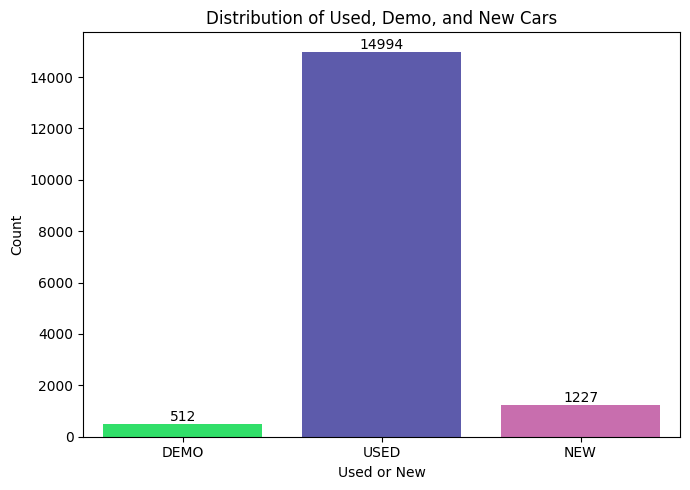

In [ ]:
# Create a count plot using the correct column, assigning 'UsedOrNew' to hue
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_orign, x='UsedOrNew', hue='UsedOrNew', palette=random_colors_hex, legend=False)

# Adding labels to each bar
for i in ax.containers:
    ax.bar_label(i)

# Adding titles and labels
plt.title('Distribution of Used, Demo, and New Cars')
plt.xlabel('Used or New')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

### Insights

Data Overview:
The dataset contains a total of 17,733 vehicles, categorized into Demo cars, Used cars, and New cars.
Distribution Analysis:
Used cars dominate the market, making up 84.5% of the total dataset. Attract budget-conscious buyers looking for affordability, reliability, and value for money in vehicles that have already undergone some depreciation.

New cars account for 6.9%. Appeal to consumers seeking the latest technology, manufacturer warranties, and state-of-the-art vehicles.

Demo cars are the least common, comprising 2.9%. Popular among buyers who want a nearly new vehicle with minimal mileage but prefer a slightly lower price compared to brand-new models.

## B. Type of Drive

- Using df_orign

In [ ]:
random_colors_hex = generate_random_colors(df_orign, 'DriveType')

### [Visualization]

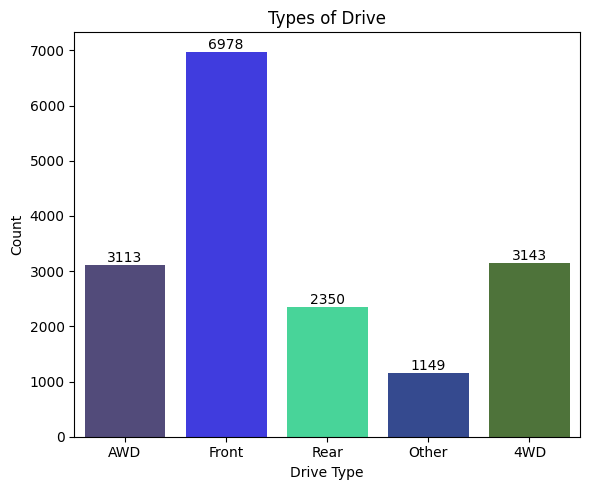

In [ ]:
plt.figure(figsize=(6, 5))
# Assign 'DriveType' to 'hue' to avoid the warning
ax = sns.countplot(data=df_orign, x='DriveType', hue='DriveType', palette=random_colors_hex, legend=False)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Types of Drive')
plt.xlabel('Drive Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Insights

Data Overview:
The dataset reflects the distribution of vehicles by types of drive available in the Australian market for 2023
Distribution Across Drive Types:
Front-Wheel Drive is the most common drive type, making up 39.3% of the total vehicles.
AWD follows with 17.6%.
4WD accounts for 17.7%.
Rear-Wheel Drive vehicles make up 13.2%.
Other Drive Types (Electric, Hybrid, etc.) comprise 6.5% of the vehicles.

## C. Brand-wise distribution of cars using a bar chart

In [ ]:
print("\n* Example: Brand Mapping:")
brand_mapping = encoding_mappings['brand']
print(brand_mapping)


* Example: Brand Mapping:
{'Abarth': 0, 'Alfa': 1, 'Aston': 2, 'Audi': 3, 'BMW': 4, 'BYD': 5, 'Bentley': 6, 'Caterham': 7, 'Chery': 8, 'Chevrolet': 9, 'Chrysler': 10, 'Citroen': 11, 'Cupra': 12, 'Daewoo': 13, 'Daihatsu': 14, 'Datsun': 15, 'Dodge': 16, 'FPV': 17, 'Ferrari': 18, 'Fiat': 19, 'Ford': 20, 'Foton': 21, 'GWM': 22, 'Geely': 23, 'Genesis': 24, 'Great': 25, 'HSV': 26, 'Haval': 27, 'Hino': 28, 'Holden': 29, 'Honda': 30, 'Hummer': 31, 'Hyundai': 32, 'Ineos': 33, 'Infiniti': 34, 'International': 35, 'Isuzu': 36, 'Iveco': 37, 'Jaguar': 38, 'Jeep': 39, 'Kia': 40, 'LDV': 41, 'Lamborghini': 42, 'Land': 43, 'Lexus': 44, 'Lotus': 45, 'MG': 46, 'Mahindra': 47, 'Maserati': 48, 'Mazda': 49, 'McLaren': 50, 'Mercedes-Benz': 51, 'Mini': 52, 'Mitsubishi': 53, 'Nissan': 54, 'Opel': 55, 'Packard': 56, 'Peugeot': 57, 'Polestar': 58, 'Porsche': 59, 'Proton': 60, 'Ram': 61, 'Renault': 62, 'Rolls-Royce': 63, 'Rover': 64, 'Saab': 65, 'Skoda': 66, 'Smart': 67, 'Ssangyong': 68, 'Subaru': 69, 'Suzuki': 

In [ ]:
print(df_data_analysis_numeric_df.columns)

Index(['year', 'kilometres', 'price', 'brand_num', 'model_num', 'car_suv_num',
       'title_num', 'usedornew_num', 'transmission_num', 'engine_num',
       'drivetype_num', 'fueltype_num', 'fuelconsumption_num',
       'colourextint_num', 'location_num', 'cylindersinengine_num',
       'bodytype_num', 'doors_num', 'seats_num'],
      dtype='object')


In [ ]:
# Count the number of cars per brand number
brand_counts = df_data_analysis_numeric_df['brand_num'].value_counts()

# Map the brand numbers to their actual names using the dictionary
brand_counts.index = brand_counts.index.map({v: k for k, v in brand_mapping.items()})


In [ ]:
min_year = int(df_data_analysis_numeric_df['year'].min())
max_year = int(df_data_analysis_numeric_df['year'].max())

print(f"\n* Data between {min_year} and {max_year}")


* Data between 1940 and 2023


In [ ]:


print(brand_counts.head())
print(brand_counts.describe())

brand_num
Toyota     2785
Hyundai    1239
Mazda      1179
Holden     1087
Ford       1055
Name: count, dtype: int64
count      76.000000
mean      220.184211
std       443.365243
min         1.000000
25%         3.750000
50%        16.000000
75%       205.750000
max      2785.000000
Name: count, dtype: float64


In [ ]:
random_colors_hex = generate_random_colors(df_orign, 'Brand')

### [Visualization]

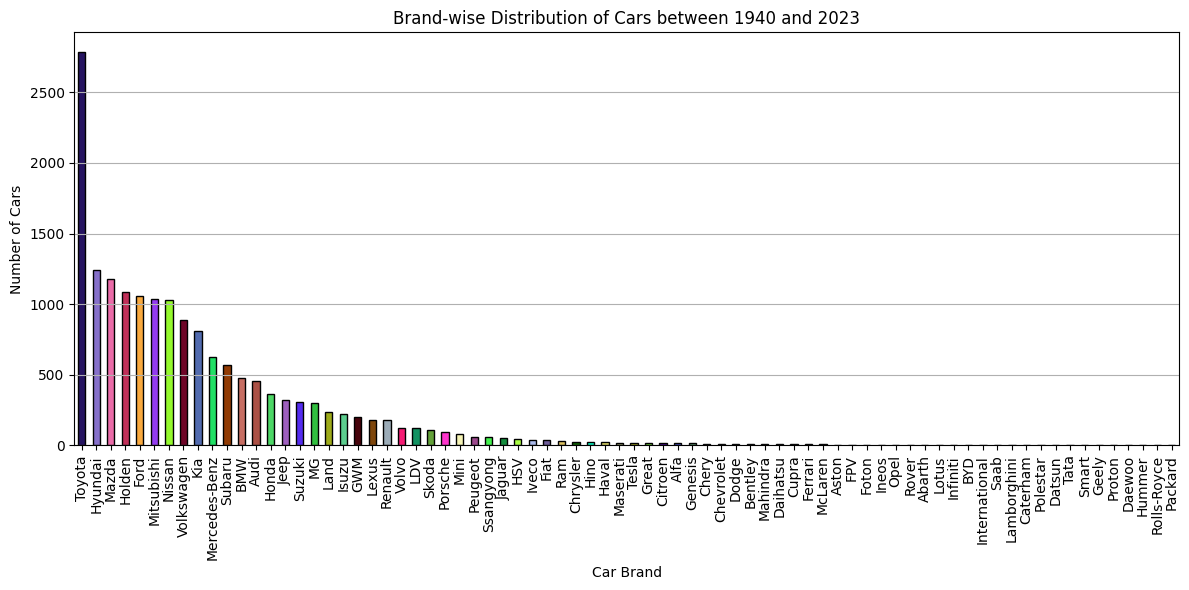

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar', color=random_colors_hex, edgecolor='black')

# Adding titles and labels
plt.title(f'Brand-wise Distribution of Cars between {min_year} and {max_year}')
plt.xlabel('Car Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.grid(axis='y')

# Show the plot
plt.tight_layout()

### Insights

Data Overview:
The graph shows the brand distribution of cars between 1940 to 2023 in Australia.
Distribution Analysis:
Toyota is the most popular car brand, with significantly more car than the other brands. This can indicate that Toyota is a trusted brand for cars for Australians.
Other popular brands are: Hyundai, Mazda, Holden and Ford.
Brands like Rolls-Royce and Aston Martin have low representation but they are also luxury/vintage brands with limited production and high price point making it not accessible to everyone.
The graph shows a big time frame with brands that have already ceased operations like Holden.

## D. Types of Fuel

- Using df_orign

In [ ]:
random_colors_hex = generate_random_colors(df_orign, 'FuelType')

### [Visualization]

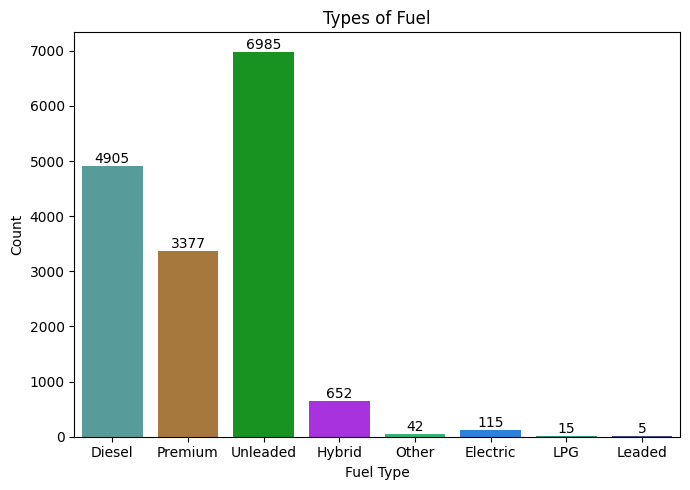

In [ ]:
plt.figure(figsize=(7, 5))

# Assign 'FuelType' to 'hue' to avoid the warning
ax = sns.countplot(data=df_orign, x='FuelType', hue='FuelType', palette=random_colors_hex, legend=False)
for i in ax.containers:
    ax.bar_label(i)

plt.title('Types of Fuel')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Insights

Data Overview:
The dataset reflects the distribution of types of fuel used in vehicles available in the Australian market for 2023
Distribution Across Fuel Types:
Unleaded is the most common fuel type, making up 43.9% of the total vehicles.
Diesel follows with 24.9%.
Premium (Petrol) accounts for 22.1%.
Hybrid vehicles make up 3.3%.
LPG represents 0.2%, with Electric and Leaded making up a very small percentage.
Other fuel types account for 0.6%.

## E. Types of Body

- Using df_orign

In [ ]:
random_colors_hex = generate_random_colors(df_orign, 'BodyType')

### [Visualization]

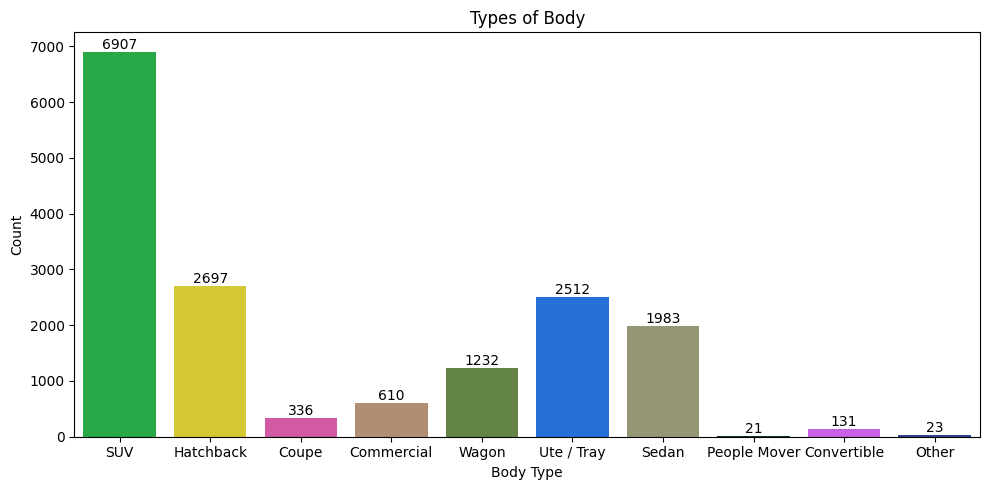

In [ ]:
plt.figure(figsize=(10, 5))

# Assign 'BodyType' to 'hue' to avoid the warning
ax = sns.countplot(data=df_orign, x='BodyType', hue='BodyType', palette=random_colors_hex, legend=False)
for i in ax.containers:
    ax.bar_label(i)

plt.title('Types of Body')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Insights

Data Overview:

The dataset reflects the distribution of body types for cars.
Distribution Across Body Types:

SUVs are the most common body type. This suggests that SUVs are the most popular in Australia due to the Australian outdoor lifestyle.

Hatchbacks are the Second Popular Type. This could indicate a preference for smaller and potentially more affordable cars.

Sedans, Wagons and Utes have moderate representation that can indicate preference for utility and practicality.

There is also presence of Niche Body Types such as Coupes and Convertibles, for a more specific public.

## F. Columns with more than 50% unique values

In [ ]:
# Get the count of non-null values for each column
count_series = df_data_analysis_numeric_df.count()

# Get the top 3 columns with the highest counts
top_3_counts = count_series.nlargest(3)

# Display the results
print("Top 3 columns with non-null counts:")
print(top_3_counts)


Top 3 columns with non-null counts:
year          16734
kilometres    16734
price         16734
dtype: int64


In [ ]:
# Get the count of non-null values for each column
count_series = df_orign.count()

# Get total number of rows in the DataFrame
total_rows = len(df_orign)

# Get columns with more than 100 unique values
columns_with_high_uniques = [col for col in df_orign.columns if df_orign[col].nunique() > 100]

print("Columns with count of unique values:")
for col in columns_with_high_uniques:
    unique_count = df_orign[col].nunique()
    count_value = count_series[col]
    # Calculate percentage
    percentage = (unique_count / total_rows) * 100
    # Format the output
    print(f"- {col}: {unique_count} unique values, Count: {count_value}, Percentage: {unique_count}/{total_rows} = {percentage:.2f}%")

Columns with count of unique values:
- Model: 781 unique values, Count: 16733, Percentage: 781/16734 = 4.67%
- Car/Suv: 618 unique values, Count: 16706, Percentage: 618/16734 = 3.69%
- Title: 8804 unique values, Count: 16733, Percentage: 8804/16734 = 52.61%
- Engine: 105 unique values, Count: 15059, Percentage: 105/16734 = 0.63%
- FuelConsumption: 156 unique values, Count: 15036, Percentage: 156/16734 = 0.93%
- Kilometres: 14260 unique values, Count: 16142, Percentage: 14260/16734 = 85.22%
- ColourExtInt: 833 unique values, Count: 16374, Percentage: 833/16734 = 4.98%
- Location: 618 unique values, Count: 16284, Percentage: 618/16734 = 3.69%
- Price: 3793 unique values, Count: 16681, Percentage: 3793/16734 = 22.67%


### [ Visualization ]

In [ ]:
# Get the count of non-null values for each column
count_series = df_orign.count()

# Get total number of rows in the DataFrame
total_rows = len(df_orign)

# Get columns with more than 100 unique values
columns_with_high_uniques = [col for col in df_orign.columns if df_orign[col].nunique() > 100]

# Prepare data for plotting
unique_counts = []
percentages = []
labels = []

for col in columns_with_high_uniques:
    unique_count = df_orign[col].nunique()
    count_value = count_series[col]
    percentage = (unique_count / total_rows) * 100

    unique_counts.append(unique_count)
    percentages.append(percentage)
    labels.append(col)

# Create a DataFrame for easier sorting
data = pd.DataFrame({
    'Label': labels,
    'Unique Count': unique_counts,
    'Percentage': percentages
})

# Sort by Unique Count
data_sorted = data.sort_values(by='Unique Count', ascending=False)





* Unique Counts and Percentages for Columns


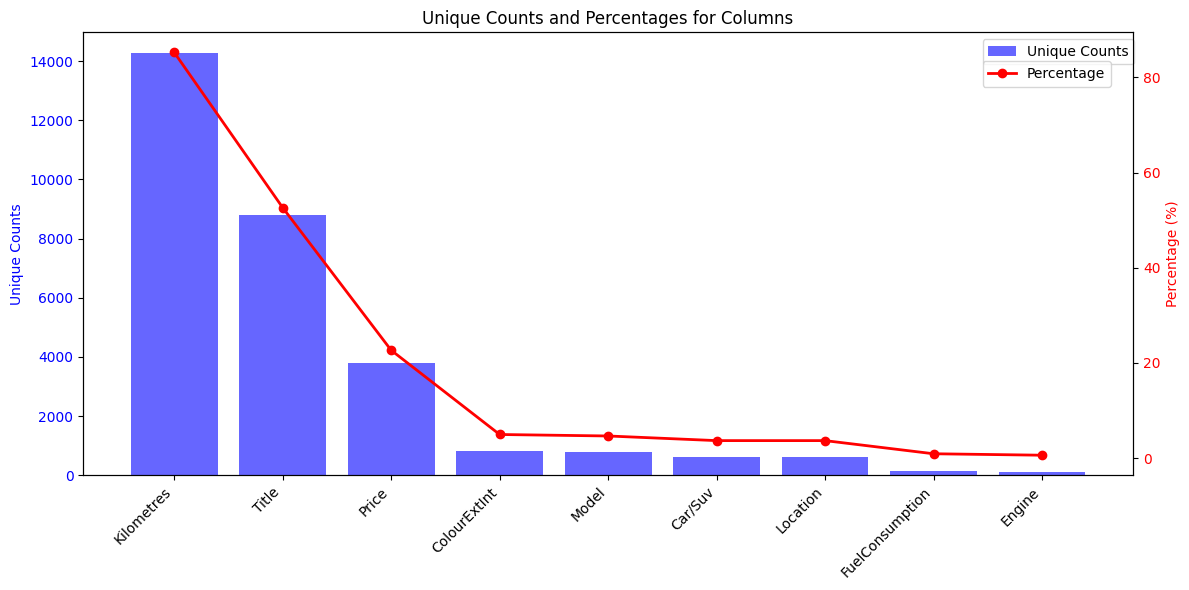

In [ ]:
print('\n* Unique Counts and Percentages for Columns')
# Create a bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a bar chart for unique counts
ax1.bar(data_sorted['Label'], data_sorted['Unique Count'], color='b', alpha=0.6, label='Unique Counts')
ax1.set_ylabel('Unique Counts', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set x-ticks properly to avoid warnings
ax1.set_xticks(range(len(data_sorted)))
ax1.set_xticklabels(data_sorted['Label'], rotation=45, ha='right')

# Create a second y-axis for percentages
ax2 = ax1.twinx()
ax2.plot(data_sorted['Label'], data_sorted['Percentage'], color='r', marker='o', label='Percentage', linewidth=2)
ax2.set_ylabel('Percentage (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add titles and legends
plt.title('Unique Counts and Percentages for Columns')
ax1.legend(loc='upper left', bbox_to_anchor=(0.85, 1))  # Position legend inside
ax2.legend(loc='upper left', bbox_to_anchor=(0.85, 0.95))   # Position legend inside

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
print(df_orign['Title'].head())

0         2022 Ssangyong Rexton Ultimate (awd)
1    2022 MG MG3 Auto Excite (with Navigation)
2                        2022 BMW 430I M Sport
3             2011 Mercedes-Benz E500 Elegance
4                   2022 Renault Arkana Intens
Name: Title, dtype: object


In [ ]:
print("\n* Original Dataset sample:\n")
df_orign.head()


* Original Dataset sample:



,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990.0
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990.0


### Insights

1. 'Title' = 'year' + 'Brand' + 'Model' + something
  - might need to drop
2. 'Engine' and 'CylindersinEngine' so simliar
  - might need to drop

## Drop the unnecessary column After EDA

In [ ]:
df_data_analysis_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   16734 non-null  float64
 1   kilometres             16734 non-null  float64
 2   price                  16734 non-null  float64
 3   brand_num              16734 non-null  int64  
 4   model_num              16734 non-null  int64  
 5   car_suv_num            16734 non-null  int64  
 6   title_num              16734 non-null  int64  
 7   usedornew_num          16734 non-null  int64  
 8   transmission_num       16734 non-null  int64  
 9   engine_num             16734 non-null  int64  
 10  drivetype_num          16734 non-null  int64  
 11  fueltype_num           16734 non-null  int64  
 12  fuelconsumption_num    16734 non-null  int64  
 13  colourextint_num       16734 non-null  int64  
 14  location_num           16734 non-null  int64  
 15  cy

### 1. Drop 'title_num'

In [ ]:
df_data_analysis_numeric_after_EDA = df_data_analysis_numeric_df.drop(columns=['title_num'])


In [ ]:
df_data_analysis_numeric_after_EDA.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   16734 non-null  float64
 1   kilometres             16734 non-null  float64
 2   price                  16734 non-null  float64
 3   brand_num              16734 non-null  int64  
 4   model_num              16734 non-null  int64  
 5   car_suv_num            16734 non-null  int64  
 6   usedornew_num          16734 non-null  int64  
 7   transmission_num       16734 non-null  int64  
 8   engine_num             16734 non-null  int64  
 9   drivetype_num          16734 non-null  int64  
 10  fueltype_num           16734 non-null  int64  
 11  fuelconsumption_num    16734 non-null  int64  
 12  colourextint_num       16734 non-null  int64  
 13  location_num           16734 non-null  int64  
 14  cylindersinengine_num  16734 non-null  int64  
 15  bo

### 2. Drop ' cylindersinengine_num'

In [ ]:
df_data_analysis_numeric_after_EDA = df_data_analysis_numeric_after_EDA.drop(columns=['cylindersinengine_num'])


In [ ]:
df_data_analysis_numeric_after_EDA.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 16734 non-null  float64
 1   kilometres           16734 non-null  float64
 2   price                16734 non-null  float64
 3   brand_num            16734 non-null  int64  
 4   model_num            16734 non-null  int64  
 5   car_suv_num          16734 non-null  int64  
 6   usedornew_num        16734 non-null  int64  
 7   transmission_num     16734 non-null  int64  
 8   engine_num           16734 non-null  int64  
 9   drivetype_num        16734 non-null  int64  
 10  fueltype_num         16734 non-null  int64  
 11  fuelconsumption_num  16734 non-null  int64  
 12  colourextint_num     16734 non-null  int64  
 13  location_num         16734 non-null  int64  
 14  bodytype_num         16734 non-null  int64  
 15  doors_num            16734 non-null 

### 3. Drop 'colourextint_num'

In [ ]:
print("\n* Example: colourextint_num Mapping:")
colourextint_mapping = encoding_mappings['colourextint']
print(colourextint_mapping)


* Example: colourextint_num Mapping:
{'- / 16 Black/Titanium Black-Titanium': 0, '- / 40Fa60': 1, '- / 44Lb20': 2, '- / Black': 3, '- / Black Leather': 4, '- / Black Leather Seats': 5, '- / Black Leather Seats With Black Interior And Red Stitching': 6, '- / Black Suede & Black Stitching': 7, '- / Brown': 8, '- / Burgundy': 9, '- / By7-L': 10, '- / Car': 11, '- / Carbon Black Dinamica/Leather': 12, '- / Dark Grey': 13, '- / Grey': 14, '- / Grey  Cloth': 15, '- / Grey/Black': 16, '- / Le': 17, '- / Leather Loun': 18, '- / Soul Black': 19, '- / White Fabric Seats With Black Inserts And White Stitching': 20, '1 years / 10,000 km': 21, '1 years / Unlimited km': 22, '2 years / 500,000 km': 23, '2 years / 60,000 km': 24, '3 years / 100,000 km': 25, '3 years / 150,000 km': 26, '3 years / 160,000 km': 27, '3 years / 200,000 km': 28, '3 years / 250,000 km': 29, '3 years / 500,000 km': 30, '3 years / Unlimited km': 31, '4 years / 100,000 km': 32, '5 years / 100,000 km': 33, '5 years / 150,000 km

In [ ]:
# Get the unique values and their counts for the specified column
unique_counts = df_data_analysis_numeric_after_EDA['colourextint_num'].value_counts()

# Display the unique values and their counts
print(f"\n* Unique values and counts in column 'colourextint_num':\n{unique_counts}\n")

# Display the top 5 unique values and their counts
top_5_counts = unique_counts.head(5)
print("\n* Top 5 unique values and counts in column 'colourextint_num':")
print(top_5_counts)

# Find the corresponding description for 614
reverse_mapping = {v: k for k, v in colourextint_mapping.items()}
description_614 = reverse_mapping.get(614, "Not found")

# Display descriptions for the top 5 unique values
print("\n* Descriptions for the top 5 unique values:")
for value in top_5_counts.index:
    description = reverse_mapping.get(value, "Not found")
    print(f"Value: {value}, Description: {description}")


* Unique values and counts in column 'colourextint_num':
colourextint_num
614    3206
669    1701
514    1117
302     941
49      905
       ... 
287       1
2         1
156       1
621       1
473       1
Name: count, Length: 833, dtype: int64


* Top 5 unique values and counts in column 'colourextint_num':
colourextint_num
614    3206
669    1701
514    1117
302     941
49      905
Name: count, dtype: int64

* Descriptions for the top 5 unique values:
Value: 614, Description: White / -
Value: 669, Description: White / Black
Value: 514, Description: Silver / -
Value: 302, Description: Grey / -
Value: 49, Description: Black / -


### Insights
3. 'ColourExtInt' is exterior/interior
too much information to consider
- might need to drop

In [ ]:
df_data_analysis_numeric_after_EDA = df_data_analysis_numeric_after_EDA.drop(columns=['colourextint_num'])


In [ ]:
df_data_analysis_numeric_after_EDA.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 16734 non-null  float64
 1   kilometres           16734 non-null  float64
 2   price                16734 non-null  float64
 3   brand_num            16734 non-null  int64  
 4   model_num            16734 non-null  int64  
 5   car_suv_num          16734 non-null  int64  
 6   usedornew_num        16734 non-null  int64  
 7   transmission_num     16734 non-null  int64  
 8   engine_num           16734 non-null  int64  
 9   drivetype_num        16734 non-null  int64  
 10  fueltype_num         16734 non-null  int64  
 11  fuelconsumption_num  16734 non-null  int64  
 12  location_num         16734 non-null  int64  
 13  bodytype_num         16734 non-null  int64  
 14  doors_num            16734 non-null  int64  
 15  seats_num            16734 non-null 

# 4. Feature Selection and Engineering

## Use Randomforest for getting the top features

In [ ]:
print("\n* X columns:")
print(df_data_analysis_numeric_after_EDA.columns)

df_data_analysis_numeric_after_EDA.info()


* X columns:
Index(['year', 'kilometres', 'price', 'brand_num', 'model_num', 'car_suv_num',
       'usedornew_num', 'transmission_num', 'engine_num', 'drivetype_num',
       'fueltype_num', 'fuelconsumption_num', 'location_num', 'bodytype_num',
       'doors_num', 'seats_num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 16734 non-null  float64
 1   kilometres           16734 non-null  float64
 2   price                16734 non-null  float64
 3   brand_num            16734 non-null  int64  
 4   model_num            16734 non-null  int64  
 5   car_suv_num          16734 non-null  int64  
 6   usedornew_num        16734 non-null  int64  
 7   transmission_num     16734 non-null  int64  
 8   engine_num           16734 non-null  int64  
 9   drivetype_num        16734 non-nul

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = df_data_analysis_numeric_after_EDA.drop(columns=['price'], errors='ignore')  # Exclude 'price' from features
y = df_data_analysis_numeric_after_EDA['price']  # Target variable

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top features based on importance
print("Feature Importance from Random Forest:")
print(importance_df)




Feature Importance from Random Forest:
                Feature  Importance
7            engine_num    0.289622
0                  year    0.282246
1            kilometres    0.084044
2             brand_num    0.052095
12         bodytype_num    0.046878
3             model_num    0.046553
10  fuelconsumption_num    0.043675
9          fueltype_num    0.043567
8         drivetype_num    0.039995
11         location_num    0.023857
4           car_suv_num    0.017896
13            doors_num    0.014518
14            seats_num    0.009306
5         usedornew_num    0.003416
6      transmission_num    0.002333


### [ Visualization ] Feature Importance from Random Forest

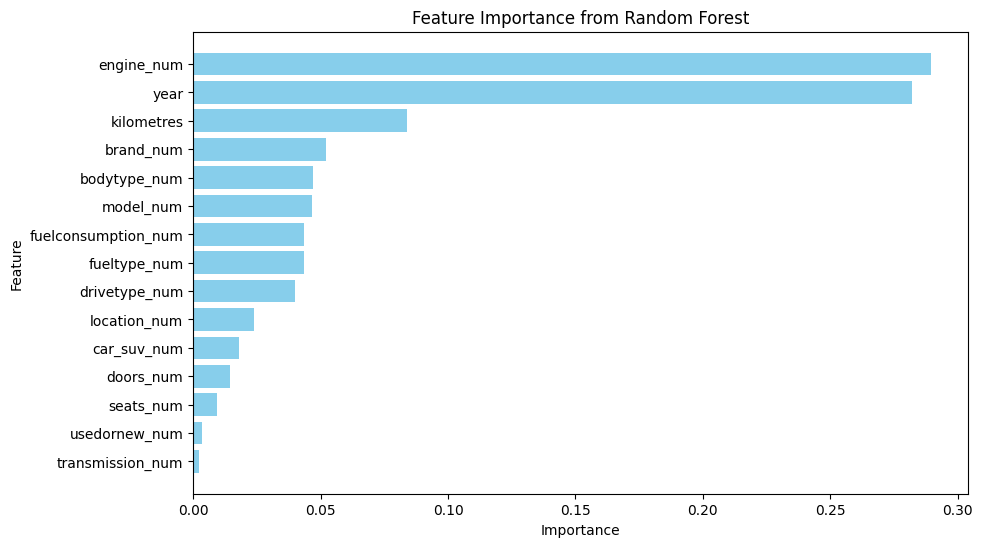

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [ ]:
# Select the top 10 features from importance_df
top_10_features_RF = importance_df['Feature'].head(10)

# Display the top 10 features
print("\n* Top 10 Features")
for feature in top_10_features_RF:
    print(feature)


* Top 10 Features
engine_num
year
kilometres
brand_num
bodytype_num
model_num
fuelconsumption_num
fueltype_num
drivetype_num
location_num


## Select the important correlation matrix

- Key feature correlations with a correlation score

In [ ]:
# Filter the DataFrame to include only the important features and the target variable 'price'
features_with_target = top_10_features_RF.tolist() + ['price']

# Calculate the correlation matrix
correlation_matrix = df_data_analysis_numeric_after_EDA[features_with_target].corr()

# Print the correlation matrix
print("\n* Print the correlation matrix")
print(correlation_matrix.info())

# Print the column names from the correlation matrix
print("\n* Column names in correlation matrix:", correlation_matrix.columns.tolist())



* Print the correlation matrix
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, engine_num to price
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_num           11 non-null     float64
 1   year                 11 non-null     float64
 2   kilometres           11 non-null     float64
 3   brand_num            11 non-null     float64
 4   bodytype_num         11 non-null     float64
 5   model_num            11 non-null     float64
 6   fuelconsumption_num  11 non-null     float64
 7   fueltype_num         11 non-null     float64
 8   drivetype_num        11 non-null     float64
 9   location_num         11 non-null     float64
 10  price                11 non-null     float64
dtypes: float64(11)
memory usage: 1.3+ KB
None

* Column names in correlation matrix: ['engine_num', 'year', 'kilometres', 'brand_num', 'bodytype_num', 'model_num', 'fuelconsumption_num', 'fueltype_num', 'dri

### Calculate the correlation matrix

### Sorting the correlation matrix

In [ ]:
# Extract the correlation of all features with the target variable 'price'
price_correlation = correlation_matrix['price']

# Sort the correlations by absolute value, descending
sorted_price_correlation = price_correlation.abs().sort_values(ascending=False)

# Create a DataFrame with sorted correlations
sorted_features = pd.DataFrame(sorted_price_correlation).reset_index()
sorted_features.columns = ['Feature', 'Correlation']

# Sort by correlation value (keeping the sign for interpretation)
sorted_features = sorted_features.sort_values(by='Correlation', ascending=False)

# Display the sorted features with their correlation values
print("\n* Display the sorted features with their correlation values")
print(sorted_features)


* Display the sorted features with their correlation values
                Feature  Correlation
0                 price     1.000000
1                  year     0.352058
2            kilometres     0.338977
3            engine_num     0.235183
4   fuelconsumption_num     0.153494
5          fueltype_num     0.153273
6         drivetype_num     0.035540
7             brand_num     0.031374
8             model_num     0.028673
9          bodytype_num     0.016416
10         location_num     0.009560


### Select the important correlation matrix

In [ ]:
# Select the top features based on their correlation with 'price'
top_10_features = sorted_features.head(11)

# Display the top features with their correlation values
print("\n* Top 9 Features with their Correlation Values")
print(top_10_features)

# Extract and print the feature names only
feature_names = top_10_features['Feature'].tolist()

print("\n* Top 10 Feature Names")
print(feature_names)
#for feature in feature_names:
#    print(feature)


* Top 9 Features with their Correlation Values
                Feature  Correlation
0                 price     1.000000
1                  year     0.352058
2            kilometres     0.338977
3            engine_num     0.235183
4   fuelconsumption_num     0.153494
5          fueltype_num     0.153273
6         drivetype_num     0.035540
7             brand_num     0.031374
8             model_num     0.028673
9          bodytype_num     0.016416
10         location_num     0.009560

* Top 10 Feature Names
['price', 'year', 'kilometres', 'engine_num', 'fuelconsumption_num', 'fueltype_num', 'drivetype_num', 'brand_num', 'model_num', 'bodytype_num', 'location_num']


### [ Visualization ] High Correlations

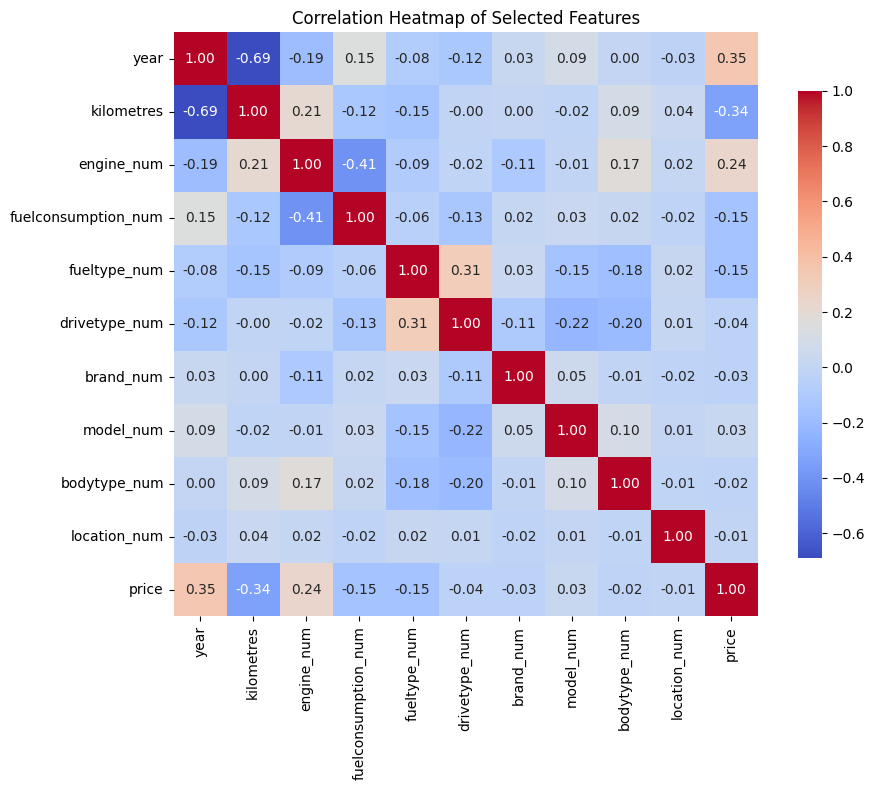

In [ ]:
# Assuming 'data' is your original DataFrame and 'top_9_features' contains the top feature names
selected_features = top_10_features['Feature'].tolist()
selected_features.remove('price')  # Remove 'price' if it's included

# Create a new DataFrame with the selected features
correlation_data = df_data_analysis_numeric_after_EDA[selected_features + ['price']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

## Insights

### Selected Features Explanation
# Car Pricing Factors

## 1. Year
- Newer cars are generally priced higher due to improved condition, advanced features, and reduced wear and tear.


## 2. Kilometres
-  Cars that have traveled fewer kilometers are often priced higher since they are perceived as less used and in better condition.


## 3. Engine_Num
- The engine size or power can significantly influence the price. Bigger or more powerful engines typically cost more.


## 4. FuelConsumption_Num
- Cars with better fuel efficiency are often more desirable and may be priced higher due to lower long-term operating costs.


## 5. FuelType_Num
- The type of fuel (e.g., petrol, diesel, hybrid, electric) impacts the price. For example, electric or hybrid cars might be more expensive due to higher demand and eco-friendliness.


## 6. DriveType_Num
- The type of drive (e.g., front-wheel, rear-wheel, all-wheel) affects performance and price. All-wheel-drive cars, for example, are often more expensive due to better handling in various conditions.


## 7. Brand_Num
- Certain brands carry more prestige or are known for quality, which increases their price.


## 8. Model_Num
- Specific models within a brand can have varying price ranges based on their features, size, and market positioning.


## 9. BodyType_Num
- Body type (e.g., sedan, SUV, coupe) influences price as it reflects the car's purpose. SUVs and larger vehicles are often more expensive.


## 10. Location_Num
- The location of the car impacts its price due to variations in demand, supply, and regional market preferences.


## Summary
These features are critical because they directly or indirectly influence car prices. Features like year, kilometres, and engine size reflect a car's condition and performance. Others, like brand, model, and location, represent market preferences and demand.





In [ ]:
print("\n* Data Origin columns 'df_orign.columns':")
df_orign.columns


* Data Origin columns 'df_orign.columns':


Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')

In [ ]:
print("\n* Encoded columns 'columns_to_encode':")
print(columns_to_encode)


* Encoded columns 'columns_to_encode':
{'brand': 'brand_num', 'model': 'model_num', 'car/suv': 'car_suv_num', 'title': 'title_num', 'usedornew': 'usedornew_num', 'transmission': 'transmission_num', 'engine': 'engine_num', 'drivetype': 'drivetype_num', 'fueltype': 'fueltype_num', 'fuelconsumption': 'fuelconsumption_num', 'colourextint': 'colourextint_num', 'location': 'location_num', 'cylindersinengine': 'cylindersinengine_num', 'bodytype': 'bodytype_num', 'doors': 'doors_num', 'seats': 'seats_num'}


In [ ]:
# Reverse mapping from encoded column names to original column names
reverse_mapping = {v: k for k, v in columns_to_encode.items()}

# Find the original names for the selected features
selected_original_names = ['year', 'price'] + [reverse_mapping[feature] for feature in selected_features if feature in reverse_mapping]

# Display the original names
print("\n* Selected Origin columns in low case 'selected_original_names':")
print(selected_original_names)

df_orign_lowcase = df_orign.copy()

# Convert column names to lowercase
print("\n* Original columns in lowcase 'df_orign_lowcase.columns'")
df_orign_lowcase.columns = df_orign.columns.str.lower()
print(df_orign_lowcase.columns)

# Filter the DataFrame to include only the selected columns
selected_df = df_orign_lowcase[selected_original_names]

# Display the first few rows of the selected DataFrame
print(("\n* Display the first few rows of the selected DataFrame"))
print(selected_df.head())


* Selected Origin columns in low case 'selected_original_names':
['year', 'price', 'engine', 'fuelconsumption', 'fueltype', 'drivetype', 'brand', 'model', 'bodytype', 'location']

* Original columns in lowcase 'df_orign_lowcase.columns'
Index(['brand', 'year', 'model', 'car/suv', 'title', 'usedornew',
       'transmission', 'engine', 'drivetype', 'fueltype', 'fuelconsumption',
       'kilometres', 'colourextint', 'location', 'cylindersinengine',
       'bodytype', 'doors', 'seats', 'price'],
      dtype='object')

* Display the first few rows of the selected DataFrame
     year     price        engine fuelconsumption  fueltype drivetype  \
0  2022.0   51990.0  4 cyl, 2.2 L  8.7 L / 100 km    Diesel       AWD   
1  2022.0   19990.0  4 cyl, 1.5 L  6.7 L / 100 km   Premium     Front   
2  2022.0  108988.0    4 cyl, 2 L  6.6 L / 100 km   Premium      Rear   
3  2011.0   32990.0  8 cyl, 5.5 L   11 L / 100 km   Premium      Rear   
4  2022.0   34990.0  4 cyl, 1.3 L    6 L / 100 km  Unleaded

In [ ]:
df_data_analysis_numeric_after_EDA[selected_features]

,year,kilometres,engine_num,fuelconsumption_num,fueltype_num,drivetype_num,brand_num,model_num,bodytype_num,location_num
0,2022.0,5595.0,32,143,0,1,68,624,6,113
1,2022.0,16.0,25,123,6,2,46,495,3,80
2,2022.0,8472.0,30,122,6,4,4,62,2,526
3,2011.0,136517.0,96,14,6,4,51,274,2,374
4,2022.0,1035.0,23,116,7,2,62,127,6,119
...,...,...,...,...,...,...,...,...,...,...
16729,2014.0,66000.0,30,130,7,2,73,121,0,460
16730,2012.0,117432.0,30,130,0,4,51,631,6,445
16731,2022.0,5165.0,26,118,7,2,70,740,6,171
16732,2016.0,85525.0,30,128,6,1,51,360,6,6


In [ ]:
selected_features

['year',
 'kilometres',
 'engine_num',
 'fuelconsumption_num',
 'fueltype_num',
 'drivetype_num',
 'brand_num',
 'model_num',
 'bodytype_num',
 'location_num']

# 5. Model Selection and Algorithms

In [ ]:
# Print the count of selected features
print("\n* Count of selected features:", len(selected_features))

# Create X and y
X = df_data_analysis_numeric_after_EDA[selected_features].drop(columns=['price'], errors='ignore')  # Exclude 'price' from features
y = df_data_analysis_numeric_after_EDA['price']  # Target variable

# Display the shapes of X and y
print("\n* Shape of X:", X.shape)
print("* Shape of y:", y.shape)


* Count of selected features: 10

* Shape of X: (16734, 10)
* Shape of y: (16734,)


## Normalize the feature data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the feature data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert the normalized data back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 16734 non-null  float64
 1   kilometres           16734 non-null  float64
 2   engine_num           16734 non-null  float64
 3   fuelconsumption_num  16734 non-null  float64
 4   fueltype_num         16734 non-null  float64
 5   drivetype_num        16734 non-null  float64
 6   brand_num            16734 non-null  float64
 7   model_num            16734 non-null  float64
 8   bodytype_num         16734 non-null  float64
 9   location_num         16734 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


In [ ]:
print(X_normalized_df.columns)

Index(['year', 'kilometres', 'engine_num', 'fuelconsumption_num',
       'fueltype_num', 'drivetype_num', 'brand_num', 'model_num',
       'bodytype_num', 'location_num'],
      dtype='object')


In [ ]:
print("\n* Encoded columns 'columns_to_encode':")
print(columns_to_encode)


* Encoded columns 'columns_to_encode':
{'brand': 'brand_num', 'model': 'model_num', 'car/suv': 'car_suv_num', 'title': 'title_num', 'usedornew': 'usedornew_num', 'transmission': 'transmission_num', 'engine': 'engine_num', 'drivetype': 'drivetype_num', 'fueltype': 'fueltype_num', 'fuelconsumption': 'fuelconsumption_num', 'colourextint': 'colourextint_num', 'location': 'location_num', 'cylindersinengine': 'cylindersinengine_num', 'bodytype': 'bodytype_num', 'doors': 'doors_num', 'seats': 'seats_num'}


In [ ]:
# Create a reverse mapping for encoded columns
reverse_mapping = {v: k for k, v in columns_to_encode.items()}

# Print the original names for each encoded column in X_normalized_df
print("\n* Original names corresponding to encoded columns:")
for col in X_normalized_df.columns:
    if col in reverse_mapping:
        original_name = reverse_mapping[col]
        print(f"{col} -> {original_name}")
    else:
        print(f"{col} -> Not encoded or original name not found")

# Print only the original names for encoded columns found in X_normalized_df
encoded_original_names = [reverse_mapping[col] for col in X_normalized_df.columns if col in reverse_mapping]

print("\n*Original names for encoded columns:")
print(encoded_original_names)


* Original names corresponding to encoded columns:
year -> Not encoded or original name not found
kilometres -> Not encoded or original name not found
engine_num -> engine
fuelconsumption_num -> fuelconsumption
fueltype_num -> fueltype
drivetype_num -> drivetype
brand_num -> brand
model_num -> model
bodytype_num -> bodytype
location_num -> location

*Original names for encoded columns:
['engine', 'fuelconsumption', 'fueltype', 'drivetype', 'brand', 'model', 'bodytype', 'location']


In [ ]:
X = X_normalized_df

## List of Selected models

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor


In [ ]:
list_of_models_1 = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ),
    'XGBoost': XGBRegressor(
        colsample_bytree=0.8,
        learning_rate=0.2,
        max_depth=5,
        min_child_weight=5,
        n_estimators=500,
        subsample=1.0,
        objective='reg:absoluteerror',
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ),
    'Support Vector Regression': SVR(
        kernel='rbf',
        C=10,
        epsilon=0.1
    ),
    'Linear Regression': LinearRegression()
}

## Create splits for training

In [ ]:
from sklearn.model_selection import train_test_split

def create_splits(X, y, test_sizes=[0.3, 0.2, 0.1], random_state=42):
    splits = []
    splits_label = []
    split_sizes = []

    for size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=size, random_state=random_state
        )
        splits.append((X_train, X_test, y_train, y_test))
        splits_label.append(f"Test Size: {size}")
        split_sizes.append(size)

    return splits, splits_label, split_sizes


In [ ]:
splits, splits_label, split_sizes = create_splits(X, y)

### [ Visualization ]Number of values for each split

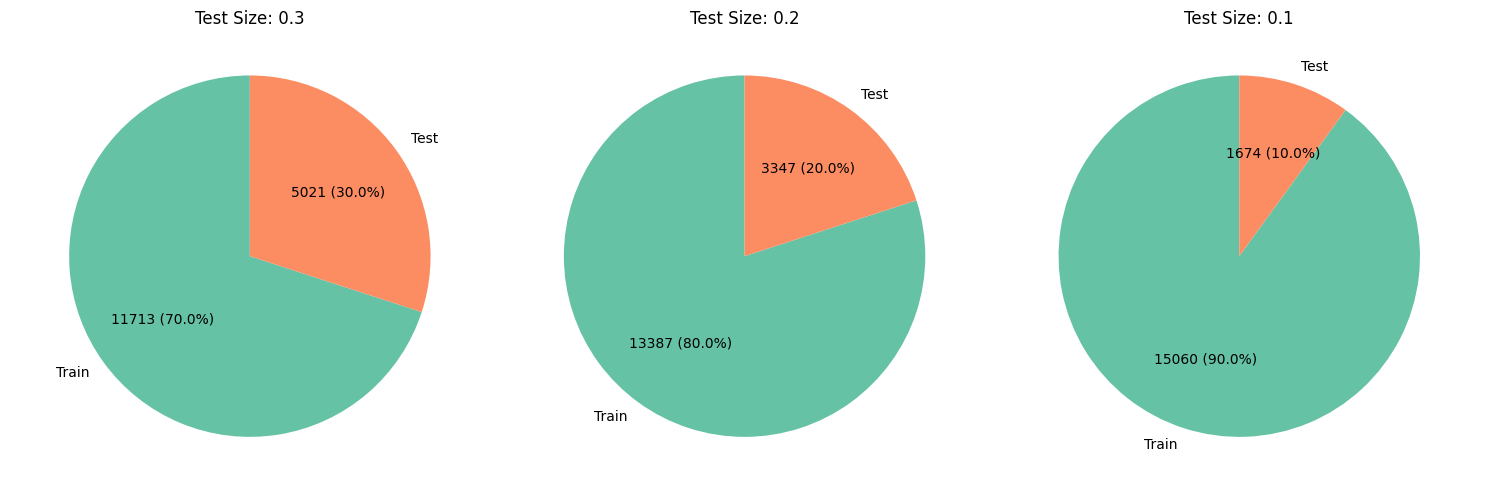

In [ ]:
# Create pie charts to visualize the number of samples
plt.figure(figsize=(15, 5))

for i, (X_train, X_test, y_train, y_test) in enumerate(splits):
    plt.subplot(1, 3, i + 1)

    # Data for pie chart
    sizes = [len(y_train), len(y_test)]
    labels = ['Train', 'Test']
    colors = ['#66c2a5', '#fc8d62']

    # Custom function to display counts and percentages
    def func(pct, allvals):
        absolute = int(np.round(pct / 100. * np.sum(allvals)))
        return f"{absolute} ({pct:.1f}%)"

    # Create pie chart
    wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.title(splits_label[i])

plt.tight_layout()
plt.show()

## Evaluate models on splits

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

def evaluate_models(models, splits, splits_label, split_sizes):
    results = []

    for split_idx, (X_train, X_test, y_train, y_test) in enumerate(splits):
        for model_name, model in models.items():
            # Train the model
            model.fit(X_train, y_train)

            # Predict on the test set
            y_pred = model.predict(X_test)

            # Calculate metrics
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            r2 = r2_score(y_test, y_pred)

            # Store the results
            results.append({
                'Split': splits_label[split_idx],
                'Split Size': split_sizes[split_idx],
                'Model': model_name,
                'RMSE': rmse,
                'R²': r2
            })

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
def plot_model_comparison(model_results_df):
    # Set up the figure and axes
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))

    # Define the bar width and positions
    bar_width = 0.25
    model_names = model_results_df['Model'].unique()
    n_models = len(model_names)
    indices = np.arange(n_models)

    # Plot RMSE
    for i, split in enumerate(model_results_df['Split'].unique()):
        subset = model_results_df[model_results_df['Split'] == split]
        ax[0].bar(indices + i * bar_width, subset['RMSE'], width=bar_width, label=split)

    ax[0].set_title('RMSE Comparison by Model')
    ax[0].set_ylabel('RMSE')
    ax[0].set_xticks(indices + bar_width / 2)
    ax[0].set_xticklabels(model_names, rotation=30)
    ax[0].legend(title='Split Size')
    ax[0].grid(axis='y')

    # Plot R²
    for i, split in enumerate(model_results_df['Split'].unique()):
        subset = model_results_df[model_results_df['Split'] == split]
        ax[1].bar(indices + i * bar_width, subset['R²'], width=bar_width, label=split)

    ax[1].set_title('R² Comparison by Model')
    ax[1].set_ylabel('R² Score')
    ax[1].set_xticks(indices + bar_width / 2)
    ax[1].set_xticklabels(model_names, rotation=30)
    ax[1].legend(title='Split Size')
    ax[1].grid(axis='y')

    print("\n* Bar Chart of Comparison result:")
    # Show the plots
    plt.tight_layout()
    plt.show()

## Comparison result 1

In [ ]:
print("\n* Comparison result:")
model_results_df_1 = evaluate_models(list_of_models_1, splits, splits_label, split_sizes)
print(model_results_df_1)


* Comparison result:
             Split  Split Size                      Model          RMSE  \
0   Test Size: 0.3         0.3              Random Forest  19286.009809   
1   Test Size: 0.3         0.3                    XGBoost  17820.132948   
2   Test Size: 0.3         0.3          Gradient Boosting  16800.806630   
3   Test Size: 0.3         0.3  Support Vector Regression  34516.594959   
4   Test Size: 0.3         0.3          Linear Regression  28945.468132   
5   Test Size: 0.2         0.2              Random Forest  18693.592715   
6   Test Size: 0.2         0.2                    XGBoost  17058.808982   
7   Test Size: 0.2         0.2          Gradient Boosting  15981.962939   
8   Test Size: 0.2         0.2  Support Vector Regression  34725.481525   
9   Test Size: 0.2         0.2          Linear Regression  29657.500829   
10  Test Size: 0.1         0.1              Random Forest  17583.813948   
11  Test Size: 0.1         0.1                    XGBoost  15702.498541   
12 


* Bar Chart of Comparison result:


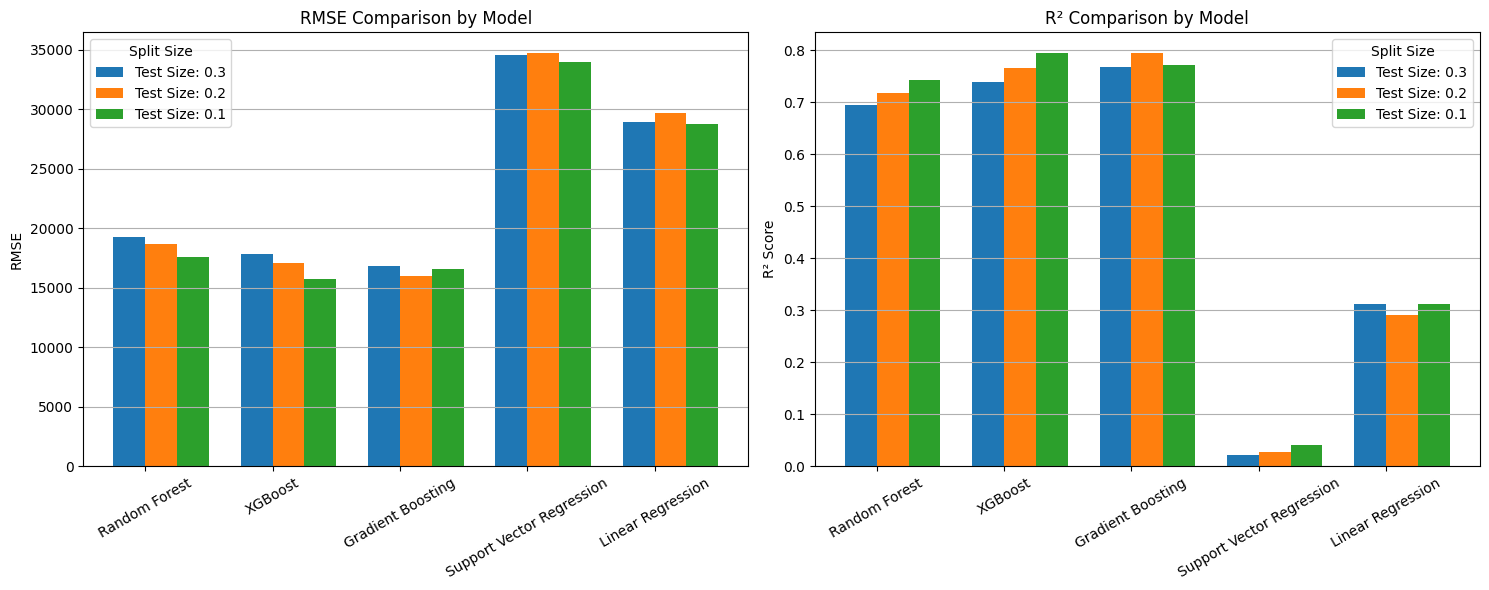

In [ ]:
plot_model_comparison(model_results_df_1)

## Comparison result 2

In [ ]:
list_of_models_2 = {
    'Random Forest': RandomForestRegressor(
    ),
    'XGBoost': XGBRegressor(
    ),
    'Gradient Boosting': GradientBoostingRegressor(
    ),
    'Support Vector Regression': SVR(
    ),
    'Linear Regression': LinearRegression()
}

In [ ]:
print("\n* Comparison result 2:")
model_results_df_2 = evaluate_models(list_of_models_2, splits, splits_label, split_sizes)
print(model_results_df_2)


* Comparison result 2:
             Split  Split Size                      Model          RMSE  \
0   Test Size: 0.3         0.3              Random Forest  17936.265363   
1   Test Size: 0.3         0.3                    XGBoost  15261.905637   
2   Test Size: 0.3         0.3          Gradient Boosting  19571.396311   
3   Test Size: 0.3         0.3  Support Vector Regression  35514.759807   
4   Test Size: 0.3         0.3          Linear Regression  28945.468132   
5   Test Size: 0.2         0.2              Random Forest  17876.618641   
6   Test Size: 0.2         0.2                    XGBoost  15557.569229   
7   Test Size: 0.2         0.2          Gradient Boosting  19945.874784   
8   Test Size: 0.2         0.2  Support Vector Regression  35807.107864   
9   Test Size: 0.2         0.2          Linear Regression  29657.500829   
10  Test Size: 0.1         0.1              Random Forest  16147.052043   
11  Test Size: 0.1         0.1                    XGBoost  13477.409279   
1


* Bar Chart of Comparison result:


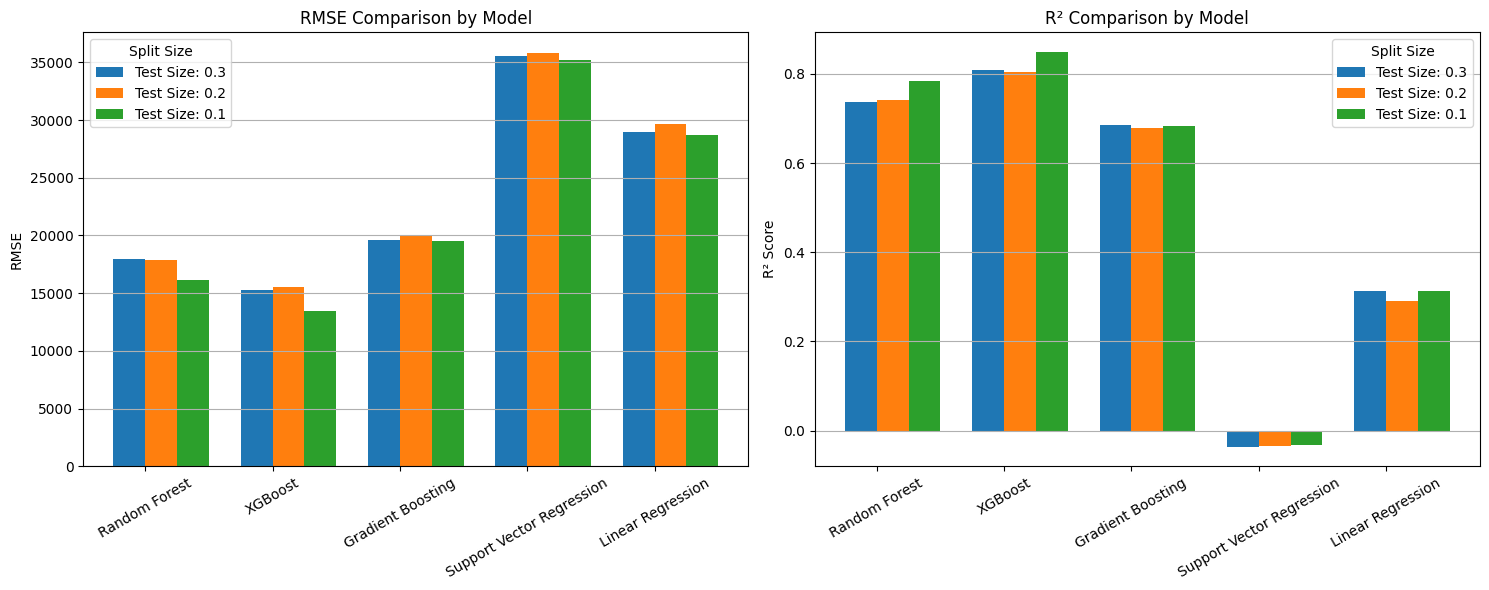

In [ ]:
plot_model_comparison(model_results_df_2)

# 6. Results of Simulation

In [ ]:
# Print the DataFrame to check column names
print(model_results_df_1.columns)

Index(['Split', 'Split Size', 'Model', 'RMSE', 'R²'], dtype='object')


## Best model

**XGBoost** appears to be the best model across all split sizes, as it consistently has the lowest RMSE and a high R² score on **Test Size = 0.1**.

## Define the Features and Target

In [ ]:
print(X_normalized_df.columns)

Index(['year', 'kilometres', 'engine_num', 'fuelconsumption_num',
       'fueltype_num', 'drivetype_num', 'brand_num', 'model_num',
       'bodytype_num', 'location_num'],
      dtype='object')


- Features (X):
    - 'year', 'kilometres', 'engine_num', 'fuelconsumption_num',
       'fueltype_num', 'drivetype_num', 'brand_num', 'model_num',
       'bodytype_num', 'location_num'
- Target (y): 'price'

- `XGBoost` on `list_of_models_2`

# 6. Used case

In [ ]:
print("selected features 'X_normalized_df.columns'")
print(X_normalized_df.columns)

selected features 'X_normalized_df.columns'
Index(['year', 'kilometres', 'engine_num', 'fuelconsumption_num',
       'fueltype_num', 'drivetype_num', 'brand_num', 'model_num',
       'bodytype_num', 'location_num'],
      dtype='object')


In [ ]:
print("\n* 'list_of_models_2' ")
print(list_of_models_2)


* 'list_of_models_2' 
{'Random Forest': RandomForestRegressor(), 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...), 'Gradient Boosting': GradientBoostingRegressor(), 'Support Vector Regression': SVR(), 'Linear Regression': LinearRegression()}


In [ ]:
best_model = {'XGBoost': list_of_models_2['XGBoost']}

In [ ]:
print("\n* result:")
model_results_df_3 = evaluate_models(best_model, splits, splits_label, split_sizes)
print(model_results_df_3)


* result:
            Split  Split Size    Model          RMSE        R²
0  Test Size: 0.3         0.3  XGBoost  15261.905637  0.808691
1  Test Size: 0.2         0.2  XGBoost  15557.569229  0.804845
2  Test Size: 0.1         0.1  XGBoost  13477.409279  0.848861



* Bar Chart of Comparison result:


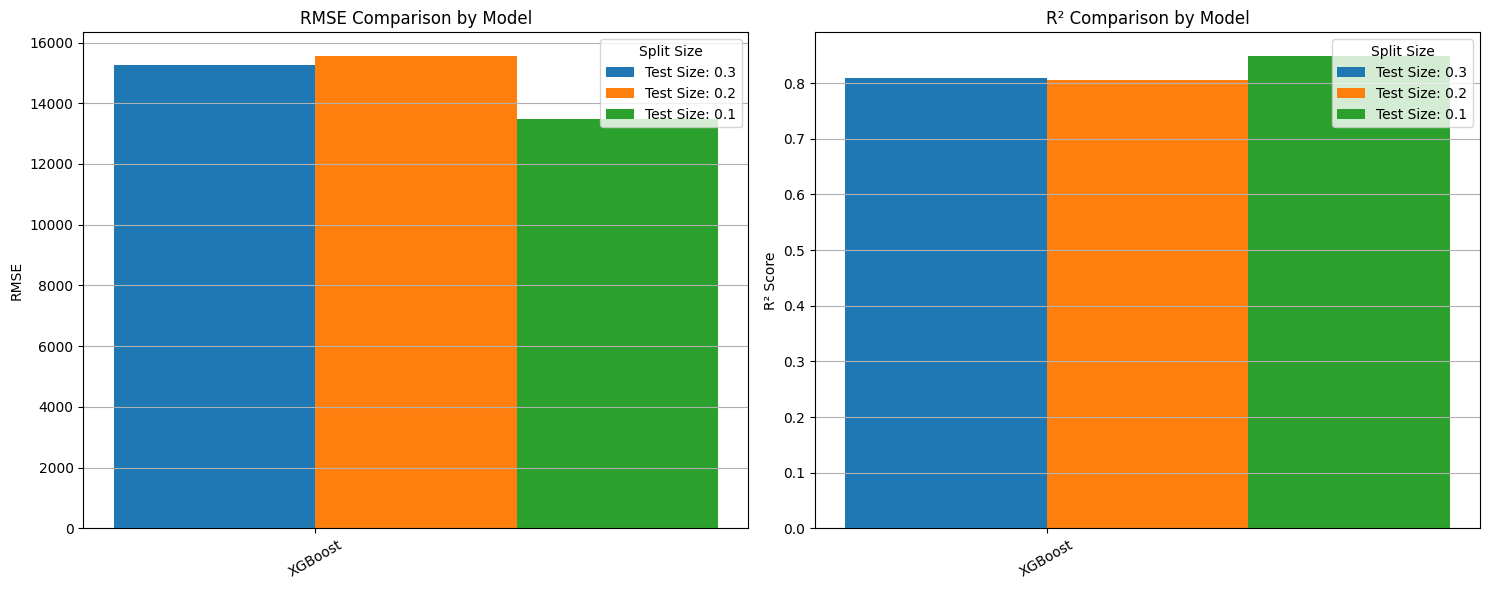

In [ ]:
plot_model_comparison(model_results_df_3)

In [ ]:
# Extract the best model from the dictionary
best_model_instance = best_model['XGBoost']  # Get the XGBoost model instance

# Correctly use the normalized features (X_normalized_df) for training
X = X_normalized_df  # Use the normalized DataFrame
y = df_data_analysis_numeric_after_EDA['price']  # Target variable

# Train the best model
best_model_instance.fit(X, y)

# Predict on the same data (or a test set if applicable)
predictions = best_model_instance.predict(X)

# Display the first 10 predictions
print("Predicted Prices:")
print(predictions[:10])  # Display the first 10 predictions


Predicted Prices:
[58764.1    20335.328  92085.15   41207.01   43391.957  17550.414
 46229.695   2461.0981 23207.773  16141.018 ]


## [ Visualization ] Model performance

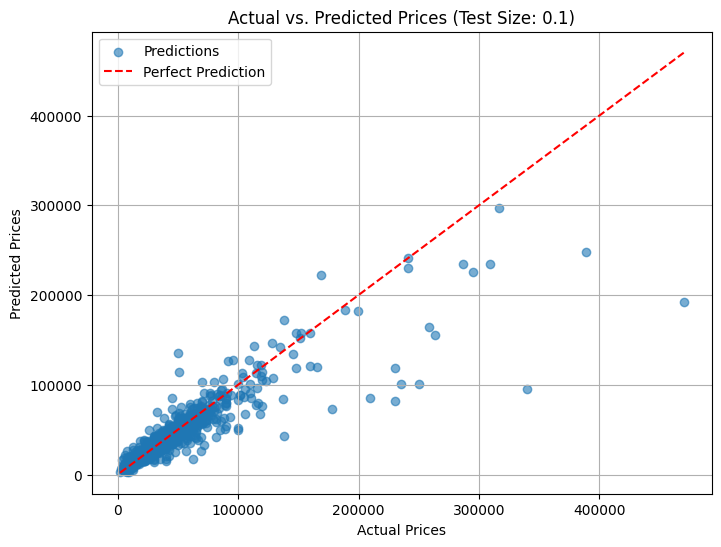

In [ ]:
X_train, X_test, y_train, y_test = splits[-1]
y_pred = list_of_models['XGBoost'].predict(X_test)

# Plot scatter
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predictions')

# Add a reference line
max_value = max(max(y_test), max(y_pred))
min_value = min(min(y_test), min(y_pred))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Test Size: 0.1)')
plt.legend()
plt.grid()
plt.show()